In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

D:\Programs\Anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.6.0


In [2]:
np.random.seed(123)
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
import pandas as pd
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['label'].values
X = df.drop(['label'],axis=1).values
print(X.shape)

(42000, 784)


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=33)
del X,y,df

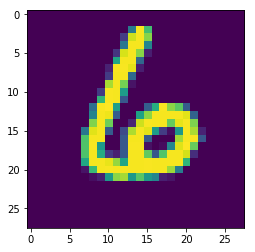

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(X_train[2].reshape([28,28]))

In [42]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [43]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
print(y_train.shape)

(31500, 10)


In [56]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

(None, 11, 11, 32)


In [57]:
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),activation='relu'))
#model.add(Dropout(0.25))
print(model.output_shape)

(None, 2, 2, 64)


In [58]:
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [59]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [60]:
model.fit(X_train,y_train,batch_size=32,epochs=10,verbose=1)

Epoch 1/10
31500/31500 [==============================] - 11s 362us/step - loss: 0.2691 - acc: 0.9165
Epoch 2/10
31500/31500 [==============================] - 10s 327us/step - loss: 0.0795 - acc: 0.9765
Epoch 3/10
31500/31500 [==============================] - 10s 321us/step - loss: 0.0575 - acc: 0.9833
Epoch 4/10
31500/31500 [==============================] - 10s 304us/step - loss: 0.0441 - acc: 0.9868
Epoch 5/10
31500/31500 [==============================] - 10s 317us/step - loss: 0.0369 - acc: 0.9886
Epoch 6/10
31500/31500 [==============================] - 10s 320us/step - loss: 0.0333 - acc: 0.9893
Epoch 7/10
31500/31500 [==============================] - 10s 317us/step - loss: 0.0270 - acc: 0.9920
Epoch 8/10
31500/31500 [==============================] - 10s 320us/step - loss: 0.0233 - acc: 0.9932
Epoch 9/10
31500/31500 [==============================] - 10s 324us/step - loss: 0.0206 - acc: 0.9942
Epoch 10/10
31500/31500 [==============================] - 10s 327us/step - loss: 

In [61]:
y_predict = model.predict(X_test)
print(y_predict.shape)

(10500, 10)


In [62]:
correct_prediction = tf.equal(tf.argmax(y_predict,1),tf.argmax(y_test,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
with tf.Session() as sess:
    print(sess.run(accuracy))

0.98657143


In [63]:
df_A = pd.read_csv('test.csv')
df_A.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
test_A = df_A.values
test_A = test_A.reshape(test_A.shape[0],28,28,1)
test_A = test_A.astype('float32')
test_A /= 255
predict_A = model.predict(test_A)

In [53]:
predict = np.argmax(predict_A,axis=1)
predict

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [54]:
sub = pd.DataFrame({'ImageId':np.arange(1,28001),'Label':predict})
sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [55]:
sub.to_csv('my_submission.csv',index=False)